# Project: Investigate TMDb movie data set

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction
This data set contains information about 10,000 movies collected from the Movie Database (TMDb).
<li>the Columns in this data set are :</li>
1. **id**: Unique id's for each movie<br>
2. **imdb_id**: Original IMDb id for each movie<br>
3. **popularity**: Popularity score <br>
4. **budget**: Budget in dollars <br>
5. **revenue**: Revenue in dollars <br>
6. **original_title**: Movie title <br>
7. **cast**: cast performed in movie <br>
8. **homepage**: Website link of movie <br>
9. **director**: Movie director <br>
10. **tagline**: Tagline of movie <br>
11. **keywords**: Words used to give significant idea <br>
12. **overview**: General review of movie <br>
13. **runtime**: Movie duration in minutes <br>
14. **genres**: Categories of movie <br>
15. **production_companies**: Company name which manages a movie process from start to finish <br>
16. **release_date**: Movie releasing date <br>
17. **vote_count**: Votes given by viewers <br>
18. **vote_average**: Average votes given by viewers <br>
19. **release_year**: Movie releasing year <br>
20. **budget_adj**: budget in 2010 dollars,accounting for inflation <br>
21. **revenue_adj**: revenue in 2010 dollars,accounting for inflation <br>
*** We are going to investigate this data set and Know some characterstics about some movies and their revenues and budget ***

### Questions For Analysis
1-Which Year has The most Profits From 2006 to 2015?<br>
2-Is There a relationship between "vote_average" & "budget_adj"?<br>
3-How the number of movies produced each year changed year by year?<br>
4-What is the Month(s) that has high revenues?<br>
5-How many movies of a particular genre have been released?<br>


## Data Wrangling

### General Properties

In [2]:
#import neccessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# read TMDb csv file 
df= pd.read_csv('tmdb-movies.csv')

In [4]:
# Showing the first 5 rows 
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Ammm,we see that we have many columns .we will see if we will use all this columns or not later

In [5]:
#Shape of the data
df.shape

(10866, 21)

**we see that we have 10866 rows and 21 columns**

In [6]:
# Let's know If we have any Nan values or not and about the types of the values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

**That seems that some columns has missing data** 

In [7]:
#let's show statistics about our data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


**But Some statistics has no meaning as there are values that are not qualititive data**

In [8]:
#let's creat array without the 'id' column as it's not a scale data and calculates the correlation between every two variables('columns')
df_corr=df.drop(columns=['id']).corr()

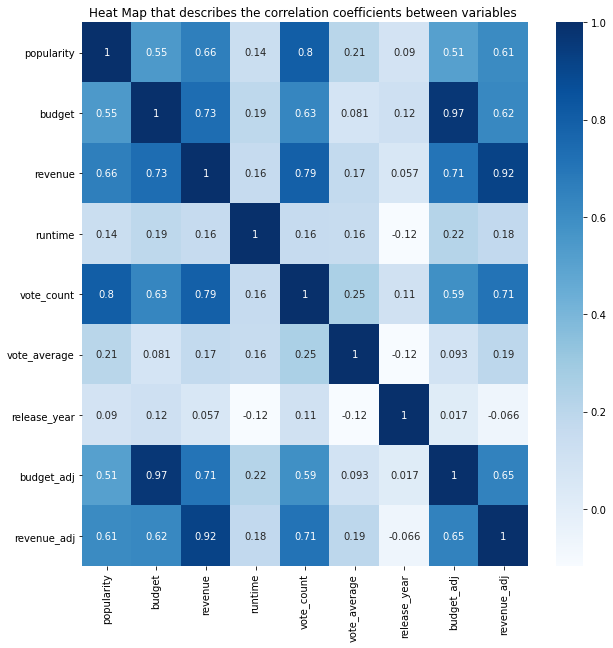

In [9]:
#Let's then graph the heatmap that describes the correlation coeffecints between variables
plt.figure(figsize=(10,10))
sns.heatmap(df_corr,cmap='Blues',annot=True)
plt.title("Heat Map that describes the correlation coefficients between variables ");

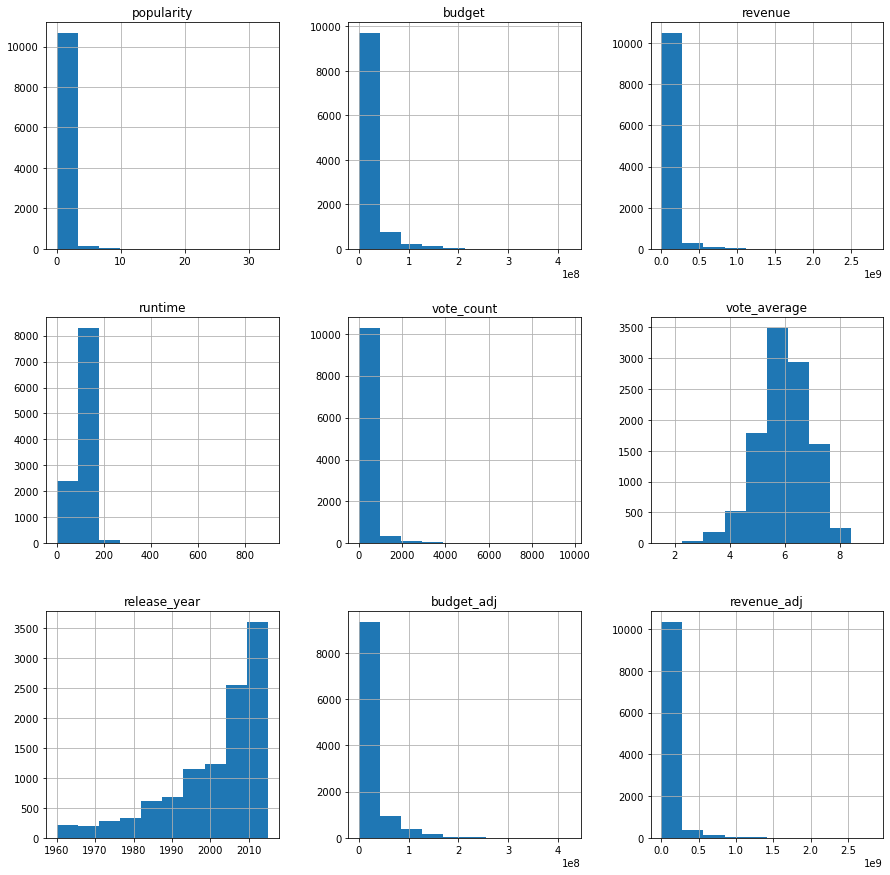

In [10]:
#graph histograms of scale variables
df.drop(columns=['id']).hist(figsize=(15,15));

### Data Cleaning
Before we make The Exploratory Data Analysis we need to clean The Data<br>
### 1.Drop Unnecessary Columns

In [11]:
# First Let's drop the columns that we don't need
df_ncolumns=df.drop(columns=['id','imdb_id','cast','homepage','tagline','keywords','overview','production_companies'])

In [12]:
#show the first row of the new data set
df_ncolumns.head(1)

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


### 2-Drop Rows with null values and changes types of some columns

In [13]:
#show the columns with sum of rows that has null values
df_ncolumns.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [14]:
#let's drop rows with null values
df_ncolumns.dropna(subset=['director','genres'],inplace=True)

In [15]:
#check again if we have null values
df_ncolumns.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [16]:
#change the type of 'release_data'
df_ncolumns['release_date']=pd.to_datetime(df_ncolumns['release_date'])

In [17]:
#Show again the type of columns and the new number of rows
df_ncolumns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10801 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      10801 non-null  float64       
 1   budget          10801 non-null  int64         
 2   revenue         10801 non-null  int64         
 3   original_title  10801 non-null  object        
 4   director        10801 non-null  object        
 5   runtime         10801 non-null  int64         
 6   genres          10801 non-null  object        
 7   release_date    10801 non-null  datetime64[ns]
 8   vote_count      10801 non-null  int64         
 9   vote_average    10801 non-null  float64       
 10  release_year    10801 non-null  int64         
 11  budget_adj      10801 non-null  float64       
 12  revenue_adj     10801 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(5), object(3)
memory usage: 1.2+ MB


**So we have now 10801 rows and 13 columns**

###  3- Drop Duplicates

In [18]:
# check if we have duplicates
sum(df_ncolumns.duplicated())

1

In [19]:
#remove that duplicated row
df_ncolumns.drop_duplicates(inplace= True)

In [20]:
#check again if we have duplicates
sum(df_ncolumns.duplicated())

0

In [21]:
#calculate again the statistics
df_ncolumns.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10800.000000,1.080000e+04,1.080000e+04,10800.000000,10800.000000,10800.000000,10800.000000,1.080000e+04,1.080000e+04
mean,0.649455,1.471114e+07,4.006558e+07,102.189722,218.600741,5.970880,2001.289537,1.765437e+07,5.167714e+07
std,1.002441,3.098677e+07,1.173193e+08,30.783873,577.165055,0.933006,12.819545,3.438403e+07,1.450182e+08
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.209156,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.385471,0.000000e+00,0.000000e+00,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.717508,1.564374e+07,2.455409e+07,111.250000,147.000000,6.600000,2011.000000,2.103337e+07,3.408743e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


**There movie(s) that its 'runtime '& "budget" &"revenue" which can't be possible**

In [22]:
#show movies that its runtime is "Zero"
df_ncolumns[df_ncolumns['runtime']==0]

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
92,1.876037,0,0,Mythica: The Necromancer,A. Todd Smith,0,Fantasy|Action|Adventure,2015-12-19,11,5.4,2015,0.000000e+00,0.0
334,0.357654,0,0,Ronaldo,Anthony Wonke,0,Documentary,2015-11-09,80,6.5,2015,0.000000e+00,0.0
410,0.097514,0,0,Anarchy Parlor,Kenny Gage|Devon Downs,0,Horror,2015-01-01,15,5.6,2015,0.000000e+00,0.0
445,0.218528,0,0,The Exorcism of Molly Hartley,Steven R. Monroe,0,Horror,2015-10-09,52,5.0,2015,0.000000e+00,0.0
486,0.176744,0,0,If There Be Thorns,Nancy Savoca,0,TV Movie|Drama,2015-04-05,11,5.4,2015,0.000000e+00,0.0
595,0.028725,0,0,Deep Dark,Michael Medaglia,0,Horror,2015-01-01,11,4.6,2015,0.000000e+00,0.0
616,0.026797,0,0,The Outfield,Michael Goldfine,0,Drama|Comedy,2015-11-10,20,6.6,2015,0.000000e+00,0.0
1289,0.037459,3250000,0,Treehouse,Michael G. Bartlett,0,Thriller|Horror|Mystery,2014-10-20,16,3.4,2014,2.993546e+06,0.0
1293,0.036904,0,0,Tim Maia,Mauro Lima,0,Documentary|Drama|Music,2014-10-30,14,6.0,2014,0.000000e+00,0.0
1849,0.120350,0,0,Spectacular!,Robert Iscove,0,Drama|Music,2009-02-16,13,5.2,2009,0.000000e+00,0.0


**<li>We have many rows that has "0" values so we can't delete it ,Let's replace these "zero" values with</li>
Means of every variable**

### 4- Replacing Zero values

In [23]:
#finding means of columns that have error values
mean_budget=df_ncolumns['budget'].mean()
mean_revenue=df_ncolumns['revenue'].mean()
mean_runtime=df_ncolumns['runtime'].mean()
mean_budget_adj=df_ncolumns['budget_adj'].mean()
mean_revenue_adj=df_ncolumns['revenue_adj'].mean()

In [24]:
# replace zero values with means
df_ncolumns['budget']=df_ncolumns['budget'].replace(0,mean_budget)
df_ncolumns['revenue']=df_ncolumns['revenue'].replace(0,mean_revenue)
df_ncolumns['runtime']=df_ncolumns['runtime'].replace(0,mean_runtime)
df_ncolumns['budget_adj']=df_ncolumns['budget_adj'].replace(0,mean_budget_adj)
df_ncolumns['revenue_adj']=df_ncolumns['revenue_adj'].replace(0,mean_revenue_adj)

In [25]:
#See again the  Descriptive Statistica
df_ncolumns.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10800.000000,1.080000e+04,1.080000e+04,10800.000000,10800.000000,10800.000000,10800.000000,1.080000e+04,1.080000e+04
mean,0.649455,2.238817e+07,6.214616e+07,102.454659,218.600741,5.970880,2001.289537,2.686734e+07,8.015698e+07
std,1.002441,2.807649e+07,1.113169e+08,30.339749,577.165055,0.933006,12.819545,3.057304e+07,1.369205e+08
min,0.000188,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.209156,1.471114e+07,4.006558e+07,90.000000,17.000000,5.400000,1995.000000,1.765437e+07,5.167714e+07
50%,0.385471,1.471114e+07,4.006558e+07,99.000000,39.000000,6.000000,2006.000000,1.765437e+07,5.167714e+07
75%,0.717508,1.564374e+07,4.006558e+07,111.250000,147.000000,6.600000,2011.000000,2.103337e+07,5.167714e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


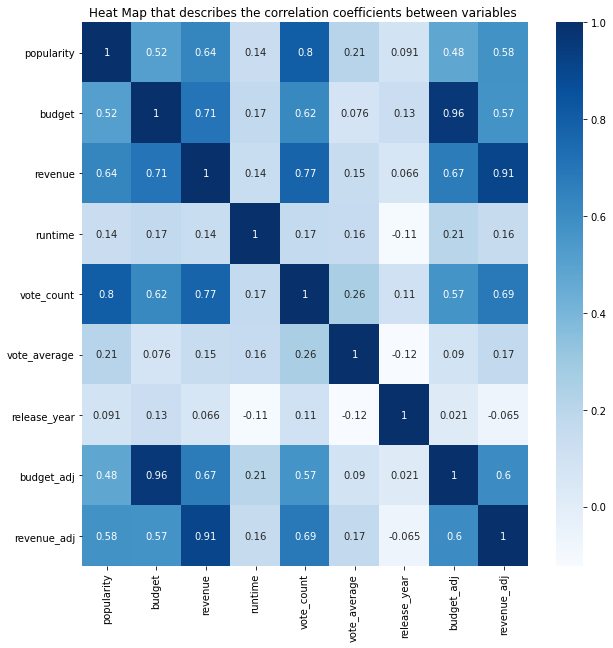

In [26]:
# graph again the graphs that we've done before cleaning data
df_ncolumns_corr=df_ncolumns.corr()
plt.figure(figsize=(10,10))
sns.heatmap(df_ncolumns_corr,cmap='Blues',annot=True)
plt.title("Heat Map that describes the correlation coefficients between variables ");

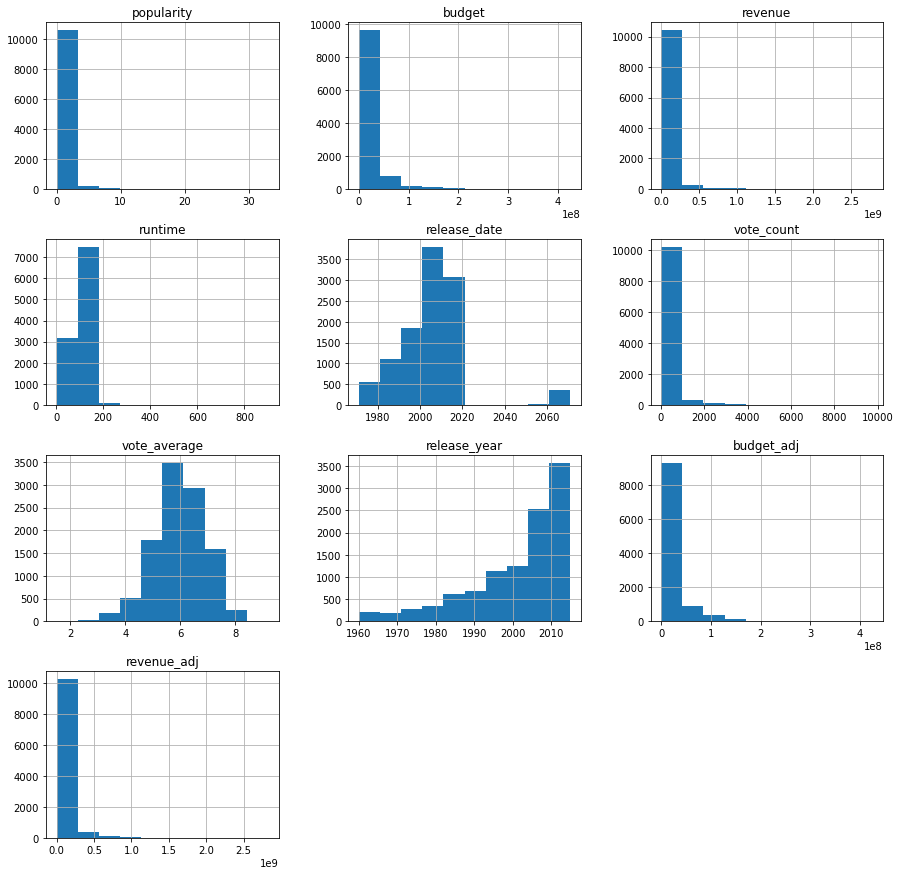

In [27]:
df_ncolumns.hist(figsize=(15,15));

## Exploratory Data Analysis

**Here we will answer some Analytical Questions**

## Research Question 1 (Which Year has The most Profits From 2006 to 2015?)

In [28]:
#create new column that called the profit
df_cleaned= df_ncolumns
df_cleaned['profit']=df_cleaned['revenue_adj']-df_cleaned['budget_adj']
df_cleaned['profit'].head()

0    1.254446e+09
1    2.101614e+08
2    1.704191e+08
3    1.718723e+09
4    1.210949e+09
Name: profit, dtype: float64

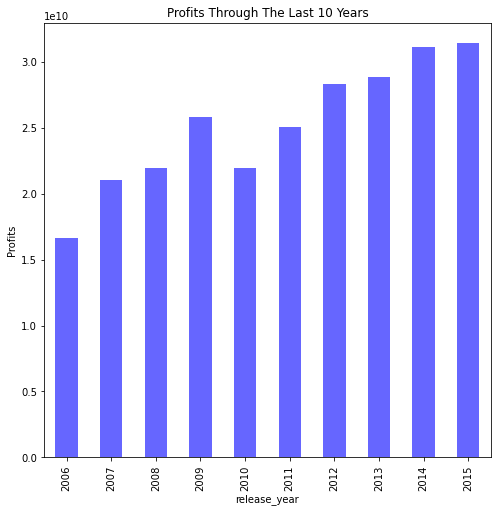

In [29]:
#graph the profit through the last 10 years
plt.figure(figsize=(8,8))
plt.title("Profits Through The Last 10 Years")
plt.xlabel('Years')
plt.ylabel('Profits')
df_cleaned.groupby('release_year').profit.sum()[-10:].plot(kind='bar',color='blue',alpha=0.6);

**We can see that The profits increase Year by Year so "2015" has the most profits however we notice that "2009" has more profits that were made in "2010"& "2011"**

## Research Question 2 (Is There a relationship between "vote_average" & "budget_adj"?)

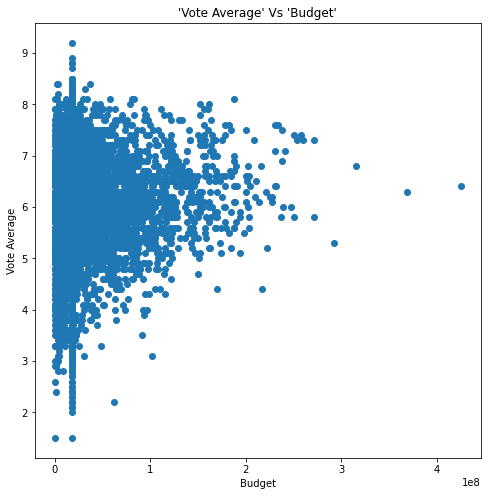

In [30]:
# create scatter plot to see any pattern in "vote_average" with "budget_adj"
plt.figure(figsize=(8,8))
plt.title("'Vote Average' Vs 'Budget'")
plt.xlabel('Budget')
plt.ylabel('Vote Average')
plt.scatter(df_cleaned['budget_adj'],df_cleaned['vote_average']);

**We can see that there is a slight increase Of Vote Average when Budget increases but generally Movies with Low Budget has High Vote Average**

## Research Question 3 ("How the number of movies produced each year changed year by year?")

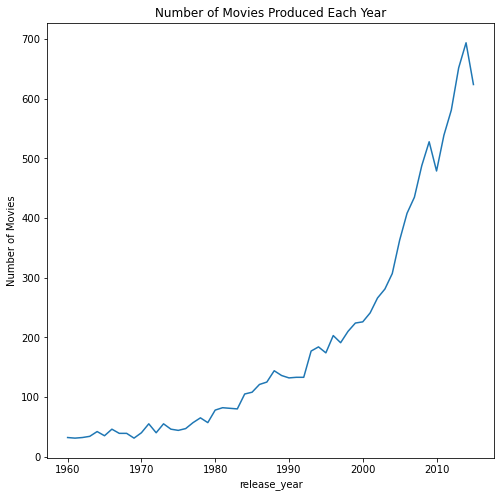

In [31]:
plt.figure(figsize=(8,8))
plt.title("Number of Movies Produced Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
df_cleaned.groupby('release_year').director.count().plot(kind='line');

**We can See That The number of movies produced each 10 years increases exponentially**

## Research Question 4 ("What is the Month(s) that has high revenues?")

In [32]:
# create column that has the month in which the movie was released
df_cleaned['month']=pd.DatetimeIndex(df_cleaned['release_date']).month
df_cleaned['month'].head()

0     6
1     5
2     3
3    12
4     4
Name: month, dtype: int64

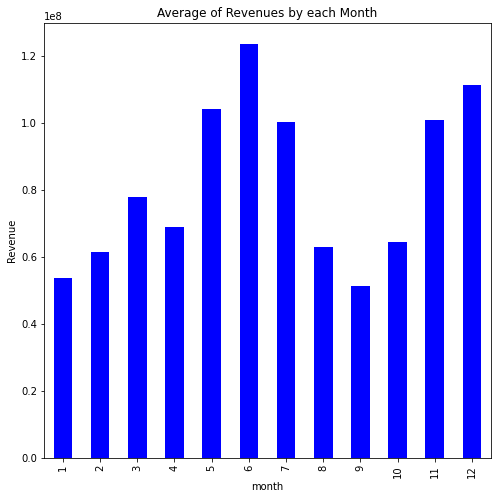

In [33]:
# create graph about Average of Revenues in all months
plt.figure(figsize=(8,8))
plt.title('Average of Revenues by each Month')
plt.xlabel('Month')
plt.ylabel('Revenue')
df_cleaned.groupby('month').revenue_adj.mean().plot(kind='bar',color='blue');

**We can that June(6th) Month has the highest Average of Revenues then December(12th)**

We can also draw it as  a pie Chart

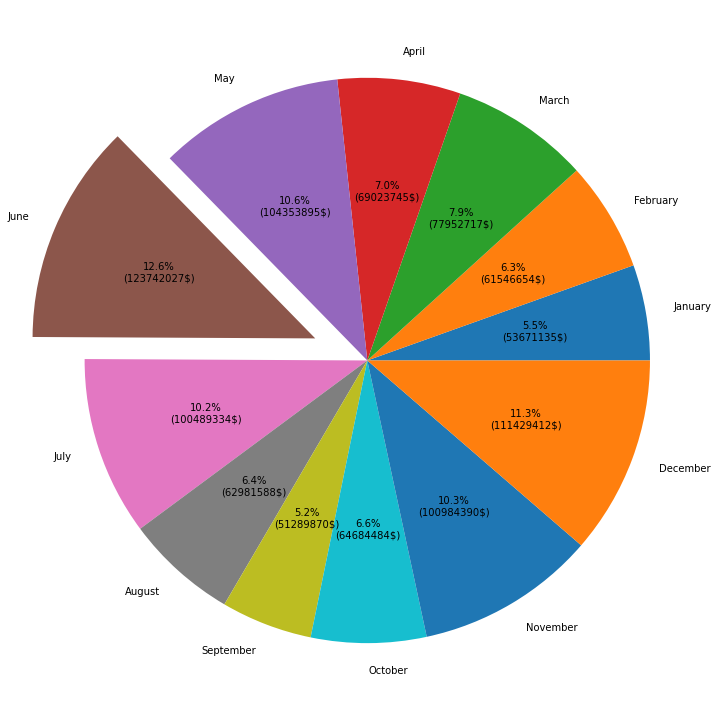

In [34]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d}$)".format(pct, absolute)
revenue_by_month =df_cleaned.groupby('month').revenue_adj.mean()
plt.figure(figsize=(13,13))
plt.pie(revenue_by_month,labels=["January",'February','March','April','May','June','July','August','September',
                                'October','November','December'],explode=[0,0,0,0,0,0.2,0,0,0,0,0,0],
       autopct = lambda pct: func(pct,revenue_by_month ));

**The Top 4 Months for Revenue Averages are June, December,May,November**

## Research Question 5 ("How many movies of a particular genre have been released?")

In [35]:
# create copy of the data set
df_genres=df_cleaned.copy()

In [36]:
# we will take the first genre before "|" in Tmdb set
df_genres['genres']=df_genres['genres'].apply(lambda x : x.split("|")[0])

In [37]:
df_genres['genres'].unique()

array(['Action', 'Adventure', 'Western', 'Science Fiction', 'Drama',
       'Family', 'Comedy', 'Crime', 'Romance', 'War', 'Mystery',
       'Thriller', 'Fantasy', 'History', 'Animation', 'Horror', 'Music',
       'Documentary', 'TV Movie', 'Foreign'], dtype=object)

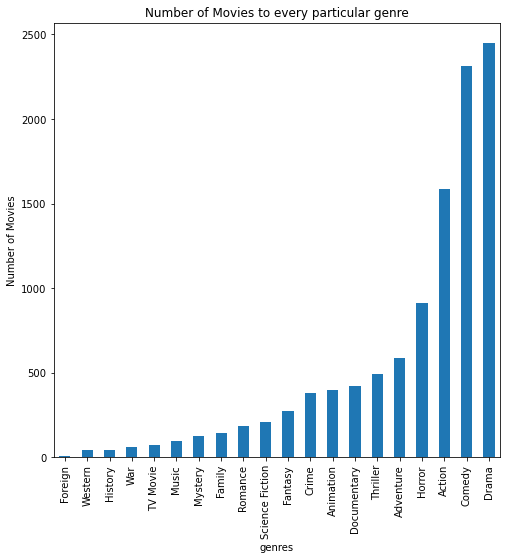

In [38]:
# creats bar chart to know number of movies of a particular genre
plt.figure(figsize=(8,8))
plt.title("Number of Movies to every particular genre")
plt.xlabel("Genres")
plt.ylabel("Number of Movies")
df_genres.groupby('genres').director.count().sort_values(ascending=True).plot(kind="bar");

**We can see that "Drama" genre is the most frequent genre of Movies then "Comedy"**

## conclusions

### Results

**After Cleaning And Exploring This Data set ,we come with some conclusions like:**
<li> **2015** is the year of most profits</li>
<li> There is no Strong relationship between budget & Vote Average</li>
<li>Number of movies produced each year increases very fast</li>
<li> **June** is the Month thought to be favourite for producers as The Highest Average of Revenues had gained in it </li>
<li> **Drama** genre is the common genre of Movies </li>

### Limitations
<li>1- Didn't use some columns In The Investiagtion as they have many null values which will impact on Our Analysis negatively</li>

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0